In [1]:
# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# numpy to calculate RMS with np.std()
import numpy as np

# pandas used for handling the large amounts of data in dataframes rather than python lists
import pandas as pd

In [2]:
# Introduce Global Variables for event num and file paths/names

EVENT_NUM = 5
directory_path = 'muon_rtd2_2023-05-25_115349'
resets_file_name = 'resets_output.txt'
g4_file_name = 'g4_output.txt'

# Plot Set 1

In [3]:
# Open the resets_output.txt file and read into pandas dataframe
resets_file_name = 'resets_output.txt'
resets_df = pd.read_csv(directory_path + '/' + resets_file_name)

In [4]:
# Scale each x_pixel and y_pixel by 4mm to get pixel distance

resets_df.pixel_x *= 4
resets_df.pixel_y *= 4

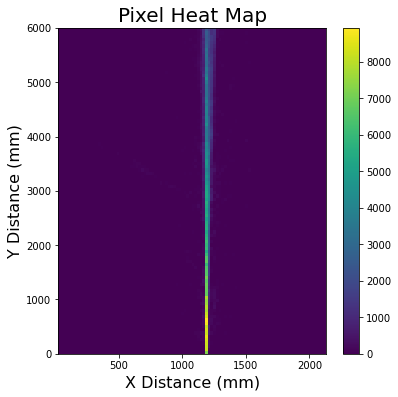

In [5]:
# Plot the collective x_pixels and y_pixels from the 100 events


# Plot dataframe's columns 'pixel_x' and 'pixel_y' on the x-axis and y-axis respectively.

plt.figure(figsize=(6,6))
plt.hist2d(resets_df.pixel_x, resets_df.pixel_y, bins=(100,100)) 

# Creates colorbar, labels axes, adds title, and shows the plot.

plt.colorbar() 
plt.xlabel('X Distance (mm)', fontsize=16)
plt.ylabel('Y Distance (mm)', fontsize=16)
plt.title('Pixel Heat Map', fontsize=20)
plt.show();

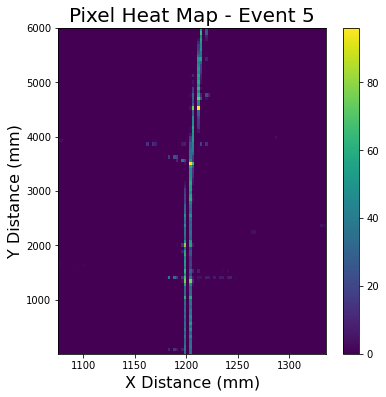

In [6]:
# Plot the x_pixels and y_pixels only from the event = EVENT_NUM


# Plot dataframe's columns 'pixel_x' and 'pixel_y' on the x-axis and y-axis respectively.
# bins=(100,100) means the histogram has 100x100 bins. Decreasing this number increases the size of each bin.

plt.figure(figsize=(6,6))
plt.hist2d(resets_df.pixel_x[(resets_df.event == EVENT_NUM)], resets_df.pixel_y[(resets_df.event == EVENT_NUM)], bins=(100,100)) 

# Creates colorbar, labels axes, adds title, and shows the plot.

plt.colorbar() 
plt.xlabel('X Distance (mm)', fontsize=16)
plt.ylabel('Y Distance (mm)', fontsize=16)
plt.title('Pixel Heat Map - Event %d' %(EVENT_NUM), fontsize=20)
plt.show();

# Plot Set 2

In [7]:
# Open the g4_output.txt file and read into pandas dataframe

g4_df = pd.read_csv(directory_path + '/' + g4_file_name)

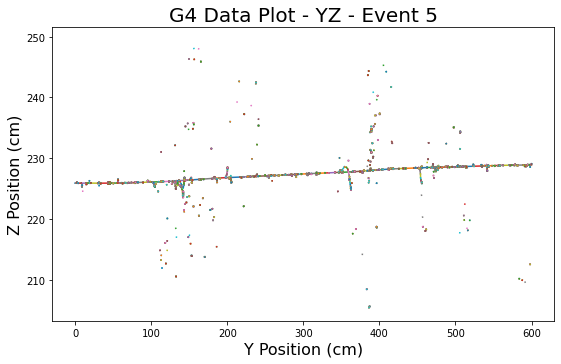

In [8]:
# Plot the YZ data for event = EVENT_NUM

plt.figure(figsize=(9, 5.4)) # scaled to dimensions of DUNE APA scaled by 1.5

# Plots lines from (yi, zi) to (yf, zf) for event = EVENT_NUM
plt.plot([g4_df.yi[(g4_df.event == EVENT_NUM)], g4_df.yf[(g4_df.event == EVENT_NUM)]],
         [g4_df.zi[(g4_df.event == EVENT_NUM)], g4_df.zf[(g4_df.event == EVENT_NUM)]])

# labels axes, adds title, and shows the plot.
plt.xlabel('Y Position (cm)', fontsize=16)
plt.ylabel('Z Position (cm)', fontsize=16)
plt.title('G4 Data Plot - YZ - Event %d' %(EVENT_NUM), fontsize=20)
plt.show();

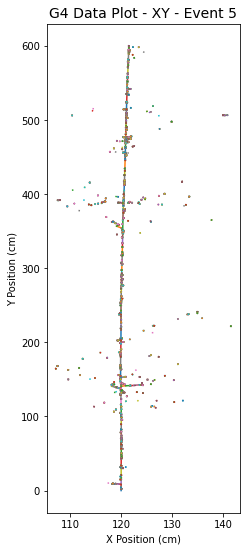

In [9]:
# Plot the XY data for event = EVENT_NUM

plt.figure(figsize=(3.45, 9)) # scaled to dimensions of DUNE APA scaled by 1.5

# Plots lines from (xi, yi) to (xf, yf) for event = EVENT_NUM
plt.plot([g4_df.xi[(g4_df.event == EVENT_NUM)], g4_df.xf[(g4_df.event == EVENT_NUM)]],
         [g4_df.yi[(g4_df.event == EVENT_NUM)], g4_df.yf[(g4_df.event == EVENT_NUM)]])

# labels axes, adds title, and shows the plot.
plt.xlabel('X Position (cm)', fontsize=10)
plt.ylabel('Y Position (cm)', fontsize=10)
plt.title('G4 Data Plot - XY - Event %d' %(EVENT_NUM), fontsize=14)
plt.show();

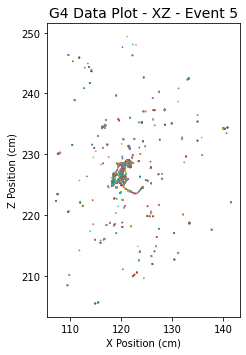

In [10]:
# Plot the XY data for event = EVENT_NUM

plt.figure(figsize=(3.45, 5.4)) # scaled to dimensions of DUNE APA scaled by 1.5

# Plots lines from (xi, zi) to (xf, zf) for event = EVENT_NUM
plt.plot([g4_df.xi[(g4_df.event == EVENT_NUM)], g4_df.xf[(g4_df.event == EVENT_NUM)]],
         [g4_df.zi[(g4_df.event == EVENT_NUM)], g4_df.zf[(g4_df.event == EVENT_NUM)]])

# labels axes, adds title, and shows the plot.
plt.xlabel('X Position (cm)', fontsize=10)
plt.ylabel('Z Position (cm)', fontsize=10)
plt.title('G4 Data Plot - XZ - Event %d' %(EVENT_NUM), fontsize=14)
plt.show();

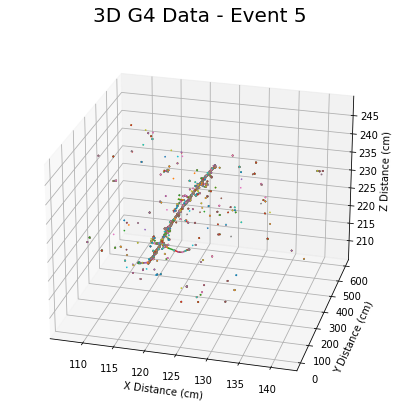

In [11]:
# 3D plot of event = EVENT_NUM

# Set plot parameters

fig = plt.figure()
fig.set_size_inches(6.9, 18, 10.8) # scaled plot to dimensions DUNE APA
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Distance (cm)', fontsize=10)
ax.set_ylabel('Y Distance (cm)', fontsize=10)
ax.set_zlabel('Z Distance (cm)', fontsize=10)
ax.view_init(elev=25, azim=285) # Viewing angle: elev changes theta (from xy plane)
                                #                azmin changes phi (0 = x_axis on RHS, 90 = y_axis on LHS)
    
plt.title('3D G4 Data - Event %d' %(EVENT_NUM), fontsize=20)

# plots lines with start/end points as: (x_i, y_i, z_i) to (x_f, y_f, z_f)
# 3D plotting requires you plot the individual lines for each row:

# Iterates through each row in DF where event = EVENT_NUM
# Plots the line for the row having coordinates(xi, yi, zi) to (xf, yf, zf) 

for index, row in g4_df[(g4_df.event == EVENT_NUM)].iterrows():
    ax.plot([row.xi, row.xf], [row.yi, row.yf], [row.zi, row.zf])
    
plt.show();

# Plot Set 3

In [42]:
# Filter out any pixels that have resets < 3 times (less than 3 occurences in the df)

# Define a new dataframe containing event, x_pixel, y_pixel and how many resets occured at each pixel
reset_num_df = resets_df.groupby(["event", "pixel_x", "pixel_y"], as_index=False).size()

# In the line above, we are defining the dataframe reset_num_df by grouping the rows by event, x_pixel, and y_pixel and
# using .size() to give us the size (number of occurences) of those groups. 

# Select only the occurences of pixels with the event == EVENT_NUM and num_resets (size) > 3
pixels_of_interest = reset_num_df[(reset_num_df["event"] == EVENT_NUM) & (reset_num_df["size"] >= 3)]

# merge pixels_of_interest with the resets_df based on pixels
merged_df = pixels_of_interest.merge(resets_df[["event", "pixel_x", "pixel_y", "reset_time"]], how = 'left', on = ["event", "pixel_x", "pixel_y"])

# We now get a datafram like (ignoring the size column now... it's served its purpose):
print(merged_df[["event", "pixel_x", "pixel_y", "reset_time"]].head(20))

    event  pixel_x  pixel_y  reset_time
0       5     1164     3880    0.001421
1       5     1164     3880    0.001422
2       5     1164     3880    0.001424
3       5     1164     3884    0.001422
4       5     1164     3884    0.001422
5       5     1164     3884    0.001423
6       5     1164     3888    0.001422
7       5     1164     3888    0.001423
8       5     1164     3888    0.001423
9       5     1164     3892    0.001423
10      5     1164     3892    0.001423
11      5     1164     3892    0.001424
12      5     1168     3896    0.001422
13      5     1168     3896    0.001423
14      5     1168     3896    0.001423
15      5     1168     3896    0.001425
16      5     1168     3900    0.001422
17      5     1168     3900    0.001423
18      5     1168     3900    0.001424
19      5     1168     3900    0.001425


In [43]:
# Find the mean TOA (mean reset_time) for each pixel

# This can be done with .groupby().mean() as it will group the rows of the df by ["event", "pixel_x", "pixel_y"]
# and include a 4th column that is the mean of reset_time for each group

# .groupby().mean() calculates the mean of the column that wasn't included in the grouping. In our case we didn't include 
# "reset_time" in the groupby statement, so the 4th column will be the mean of each group's reset_time

mean_TOA_df = merged_df[["event", "pixel_x", "pixel_y", "reset_time"]].groupby(["event", "pixel_x", "pixel_y"], as_index=False).mean()

# Renames the 4th column from reset_time -> mean_TOA. groupby() keeps the original column names
mean_TOA_df = mean_TOA_df.rename(columns = {"reset_time" : "mean_TOA"})

In [44]:
# Similarly to the previous cell, we can find the RMS of each pixel's reset time by using .groupby().std()
RMS_df = merged_df[["event", "pixel_x", "pixel_y", "reset_time"]].groupby(["event", "pixel_x", "pixel_y"], as_index=False).std()

# Renames the 4th column from reset_time -> mean_TOA. groupby() keeps the original column names
RMS_df = RMS_df.rename(columns = {"reset_time" : "RMS"})

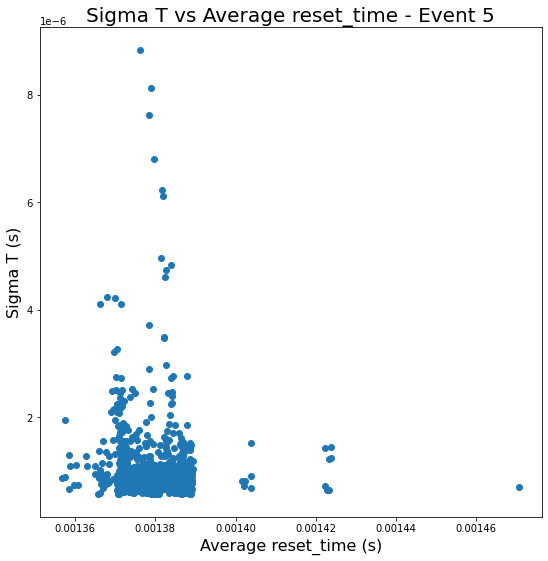

In [45]:
# scatter plot of mean_TOA vs RMS

# set plot features
plt.figure(figsize=(9,9))
plt.ylabel('Sigma T (s)', fontsize = 16)
plt.xlabel('Average reset_time (s)', fontsize =16)
plt.title('Sigma T vs Average reset_time - Event %d' %(EVENT_NUM), fontsize = 20)

# plot mean_TOA_df's column "mean_TOA" vs RMS_df's column "RMS"
plt.scatter(mean_TOA_df["mean_TOA"], RMS_df["RMS"])
    
plt.show()